# KMeans Clustering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the dataset

In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Spending']

In [4]:
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Classify Similar Customers togethor based on Income and Spending

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

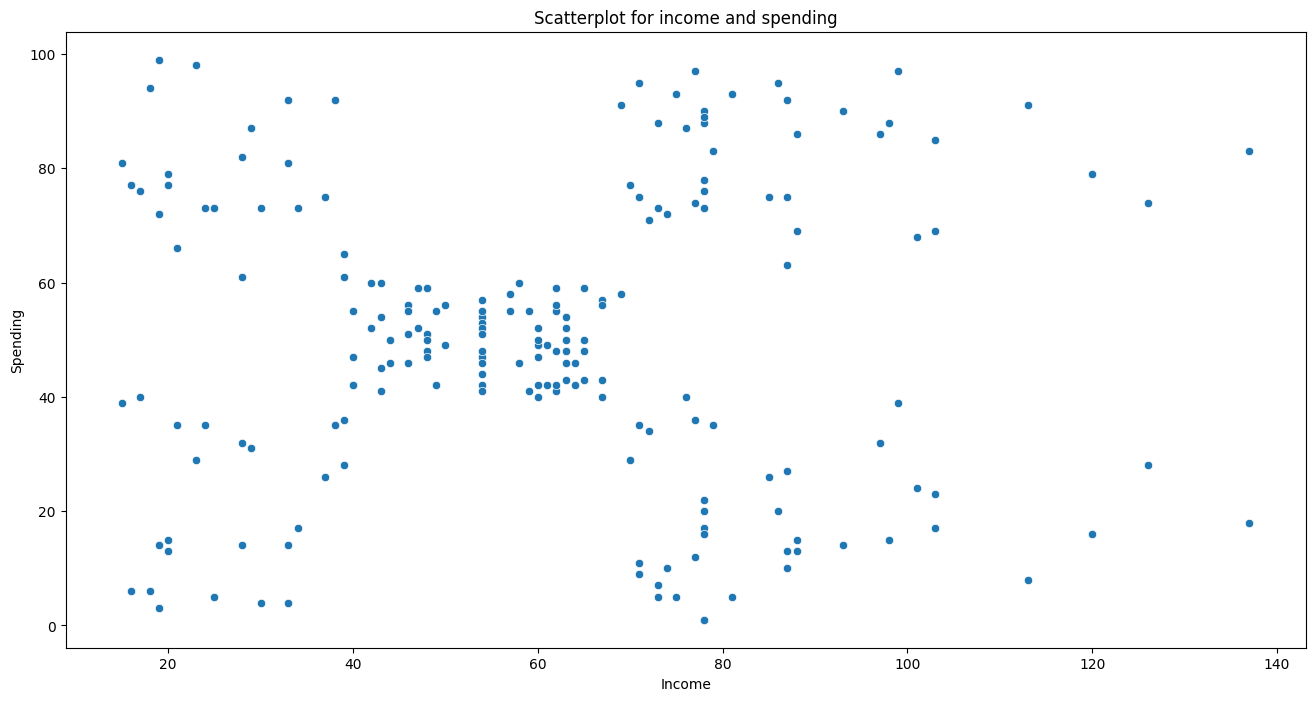

In [6]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='Income', y='Spending')
plt.title('Scatterplot for income and spending')
plt.show()

### Get the required data in X

In [7]:
X = df[['Income', 'Spending']]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Create a sklearn pipeline for X

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [10]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [11]:
cols = num_pipe.get_feature_names_out()
cols

array(['Income', 'Spending'], dtype=object)

In [12]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Get the yellowbricks package for elbow visualization

In [13]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Restart and run all cells

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer

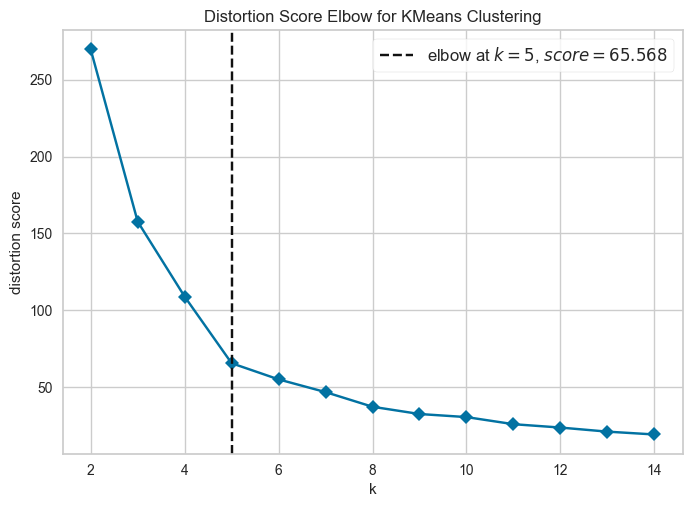

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [15]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2, 15),
                  timings=False)

### Kmeans final model

In [16]:
model1 = KMeans(n_clusters=5)
model1.fit(X_pre)

KMeans(n_clusters=5)

In [17]:
lb = model1.labels_
lb

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [18]:
X['Label'] = lb

In [19]:
X

,Income,Spending,Label
0,15,39,0
1,15,81,3
2,16,6,0
3,16,77,3
4,17,40,0
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


In [20]:
X[X['Label']==0]

,Income,Spending,Label
0,15,39,0
2,16,6,0
4,17,40,0
6,18,6,0
8,19,3,0
10,19,14,0
12,20,15,0
14,20,13,0
16,21,35,0
18,23,29,0


In [21]:
X[X['Label']==1]

,Income,Spending,Label
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1


In [22]:
X[X['Label']==2]

,Income,Spending,Label
124,70,29,2
128,71,11,2
130,71,9,2
134,73,5,2
136,73,7,2
138,74,10,2
140,75,5,2
144,77,12,2
146,77,36,2
148,78,22,2


In [23]:
X[X['Label']==3]

,Income,Spending,Label
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3


In [24]:
X[X['Label']==4]

,Income,Spending,Label
43,39,61,4
46,40,55,4
47,40,47,4
48,40,42,4
49,40,42,4
...,...,...,...
121,67,40,4
122,69,58,4
126,71,35,4
132,72,34,4


### Centroids 

In [25]:
C = X.groupby(by='Label').mean()
C

,Income,Spending
Label,,
0,26.304348,20.913043
1,86.538462,82.128205
2,88.200000,17.114286
3,25.727273,79.363636
4,55.296296,49.518519


### Visualize cluster with seaborn

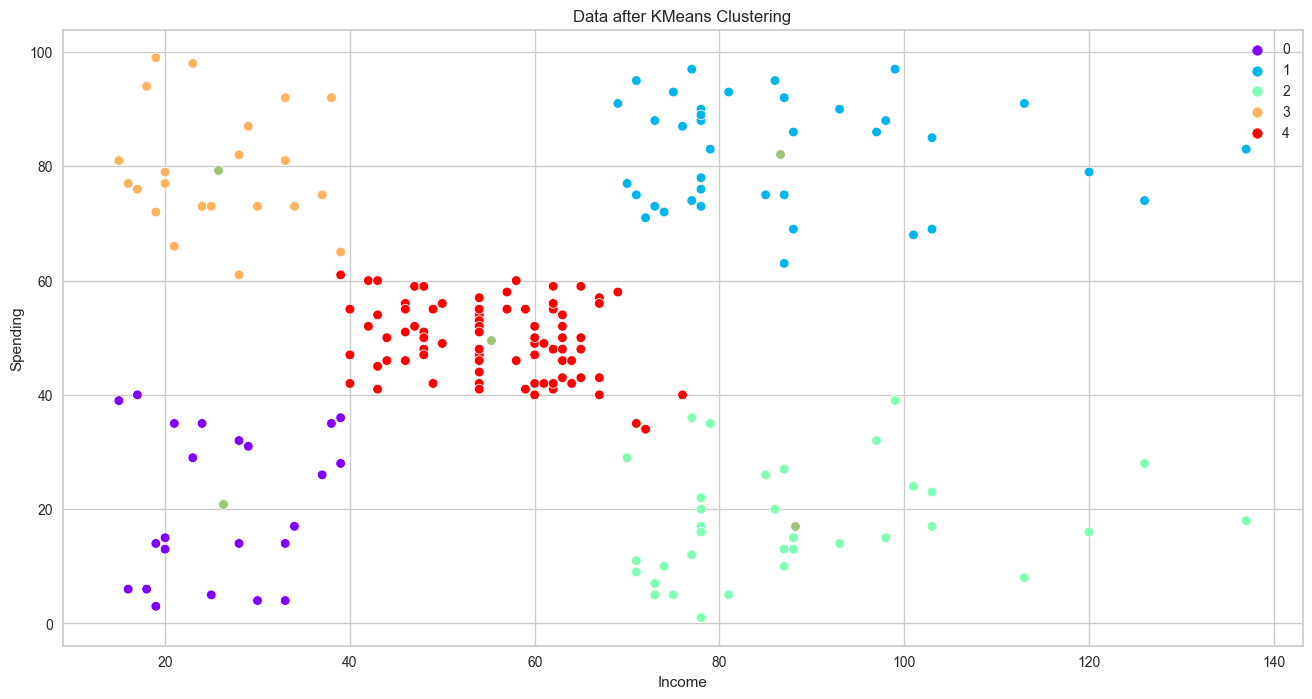

In [26]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=X, x='Income', y='Spending', hue='Label', palette='rainbow')
sns.scatterplot(data=C, x='Income', y='Spending')
plt.title('Data after KMeans Clustering')
plt.show()

### Classify similar customers on basis of Age, Income, Spending

In [27]:
X2 = df[['Age', 'Income', 'Spending']]
X2

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


### Preprocessing for X2

In [28]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [29]:
X_pre2 = num_pipe2.fit_transform(X2)
X_pre2[0:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

In [30]:
cols2 = num_pipe2.get_feature_names_out()
cols2

array(['Age', 'Income', 'Spending'], dtype=object)

In [31]:
X_pre2 = pd.DataFrame(X_pre2, columns=cols2)
X_pre2.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Apply K-elbow visualizer

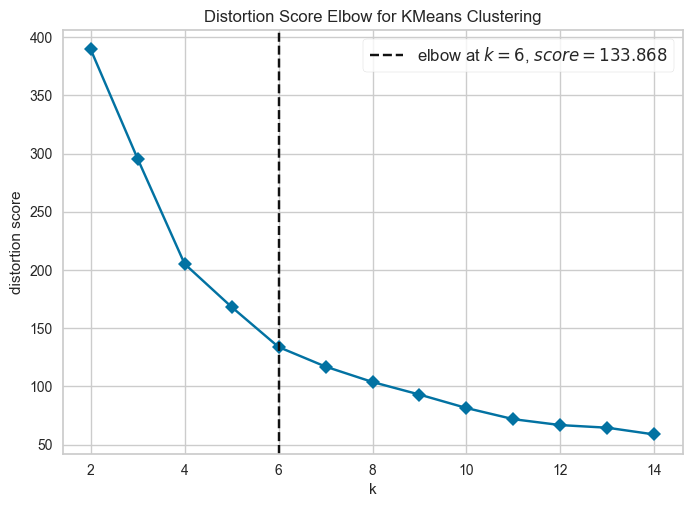

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [32]:
kelbow_visualizer(KMeans(),
                  X_pre2,
                  k=(2, 15),
                  timings=False)

### Create final model

In [33]:
model2 = KMeans(n_clusters=6)
model2.fit(X_pre2)

KMeans(n_clusters=6)

In [34]:
lb2 = model2.labels_
lb2

array([5, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 3, 5, 0, 1,
       0, 5, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 4, 1, 4, 2, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [35]:
X2['Label']=lb2

In [36]:
X2

,Age,Income,Spending,Label
0,19,15,39,5
1,21,15,81,5
2,20,16,6,0
3,23,16,77,5
4,31,17,40,0
...,...,...,...,...
195,35,120,79,4
196,45,126,28,2
197,32,126,74,4
198,32,137,18,2


In [37]:
for i in range(6):
    print(f'Cluster number : {i} \n')
    display(X2[X2['Label']==i])
    print('\n=================================================\n')

Cluster number : 0 



,Age,Income,Spending,Label
2,20,16,6,0
4,31,17,40,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0




Cluster number : 1 



,Age,Income,Spending,Label
43,31,39,61,1
47,27,40,47,1
48,29,40,42,1
49,31,40,42,1
51,33,42,60,1
52,31,43,54,1
58,27,46,51,1
61,19,46,55,1
65,18,48,59,1
68,19,48,59,1




Cluster number : 2 



,Age,Income,Spending,Label
126,43,71,35,2
128,59,71,11,2
130,47,71,9,2
134,20,73,5,2
136,44,73,7,2
138,19,74,10,2
140,57,75,5,2
144,25,77,12,2
146,48,77,36,2
148,34,78,22,2




Cluster number : 3 



,Age,Income,Spending,Label
40,65,38,35,3
46,50,40,55,3
50,49,42,52,3
53,59,43,60,3
54,50,43,45,3
55,47,43,41,3
56,51,44,50,3
57,69,44,46,3
59,53,46,46,3
60,70,46,56,3




Cluster number : 4 



,Age,Income,Spending,Label
123,39,69,91,4
125,31,70,77,4
127,40,71,95,4
129,38,71,75,4
131,39,71,75,4
133,31,72,71,4
135,29,73,88,4
137,32,73,73,4
139,35,74,72,4
141,32,75,93,4




Cluster number : 5 



,Age,Income,Spending,Label
0,19,15,39,5
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5


### Make use of plotly for 3D graphs

In [38]:
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
C2 = X2.groupby(by='Label').mean()
C2

,Age,Income,Spending
Label,,,
0,45.523810,26.285714,19.380952
1,27.000000,56.657895,49.131579
2,41.264706,88.500000,16.764706
3,56.333333,54.266667,49.066667
4,32.692308,86.538462,82.128205
5,25.000000,25.260870,77.608696


### Restart and run all cells

In [40]:
import plotly.express as px
px.scatter_3d(data_frame=X2, x='Age', y='Income', z='Spending', color='Label')